# APPLICATION OF ARTIFICAL INTELIGENCE TO DETERMINE COMPRESSIVE STRENGTH OF CONCRETE 
### group members
1.JYOTHISHREE R
2.GOPALREDDY S
3.JAYANTH BS
4.HEMANTH S


# Reading, understanding and visualising the data Preparing the data for modelling (train - test split, rescaling etc.) Training the model Residual analysis Predictions and evaluation on the test set

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
# reading the data and storing in database 'df'
df = pd.read_csv(r"C:\Users\JYOTHISHREE R\OneDrive\Desktop\CONCRETE DATA _ FINAL Year Project - Sheet1-JUN-01.csv")

In [6]:
# Display the first five rows of the database
df.head()

,Mixture no.,W/CMa,Cement(kg/m3),Water \n(KG/M3),Fly ash \nkg/m3,Fine aggregate\r\n (kg/m3),Coarse aggregate\r\n (kg/m3),Superplasticizer \n(kg/m3),Silica Fume,Age in days,Comp strength (MPa)
0,1,0.50,331.0,165.0,0.0,768.0,1153.0,0.0,0.0,1,19.4
1,1,0.50,331.0,165.0,0.0,768.0,1153.0,0.0,0.0,7,32.6
2,1,0.50,331.0,165.0,0.0,768.0,1153.0,0.0,0.0,28,40.1
3,1,0.50,331.0,165.0,0.0,768.0,1153.0,0.0,0.0,56,43.0
4,2,0.53,207.0,157.0,89.0,786.0,1178.0,0.0,0.0,1,11.5


In [7]:
df.dtypes

Mixture no.                      object
W/CMa                           float64
Cement(kg/m3)                   float64
Water \n(KG/M3)                 float64
Fly ash  \nkg/m3                float64
Fine aggregate\r\n (kg/m3)      float64
Coarse aggregate\r\n (kg/m3)    float64
Superplasticizer \n(kg/m3)      float64
Silica Fume                     float64
Age in days                       int64
Comp strength (MPa)             float64
dtype: object

In [8]:
df.shape

(1214, 11)

In [9]:
df.rename(columns={'Mixture no.':'Mix','W/CMa':'W_CM_ratio','Cement(kg/m3)':'cement_kg','Water \n(KG/M3)':'water_kg','Fly ash  \nkg/m3':'Flyash_kg','Fine aggregate\r\n (kg/m3) ':'FA_KG','Coarse aggregate\r\n (kg/m3)':'CA_KG','Superplasticizer \n(kg/m3)':'SP_KG','Silica Fume':'SF','Age in days':'age'},
          inplace=True, errors='raise')

In [10]:
df.rename(columns={'Comp strength (MPa) ':'Comp_strength'},
          inplace=True, errors='raise')

In [11]:
df = df.drop(columns="Mix", axis =1)

In [12]:
df.isnull().sum()

W_CM_ratio       0
cement_kg        0
water_kg         0
Flyash_kg        0
FA_KG            0
CA_KG            0
SP_KG            0
SF               0
age              0
Comp_strength    0
dtype: int64

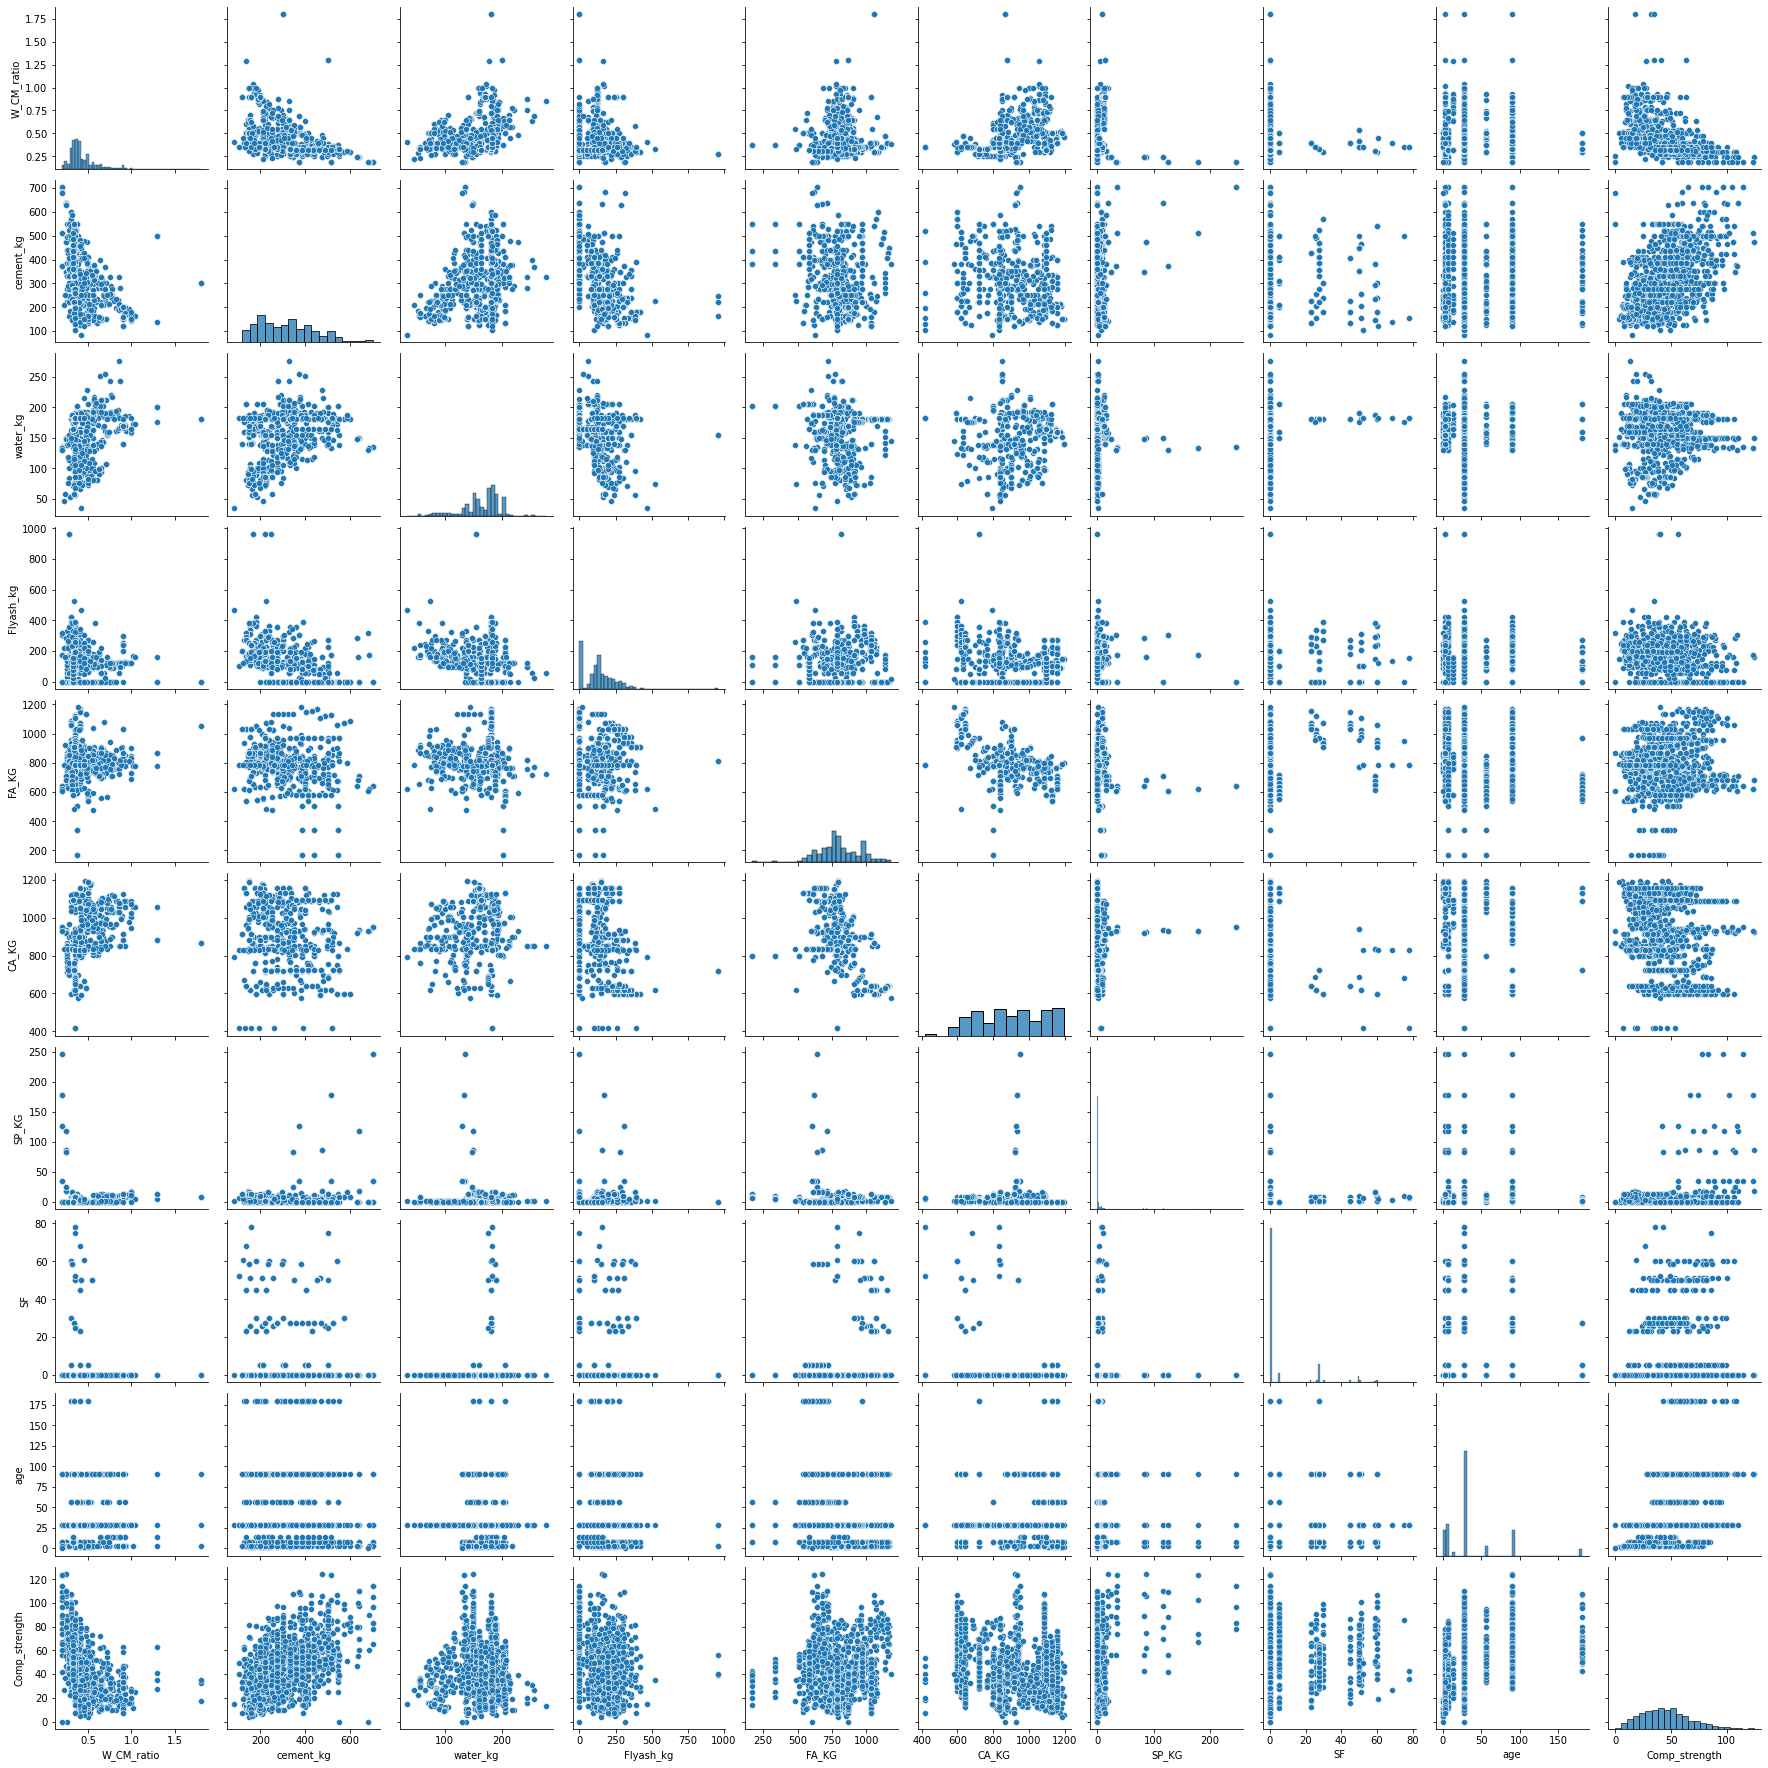

In [13]:
sns.pairplot(df)

<AxesSubplot:>

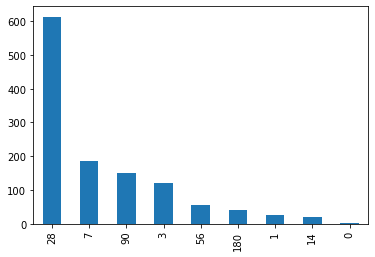

In [14]:
df['age'].value_counts().plot.bar()

<AxesSubplot:xlabel='Count', ylabel='Comp_strength'>

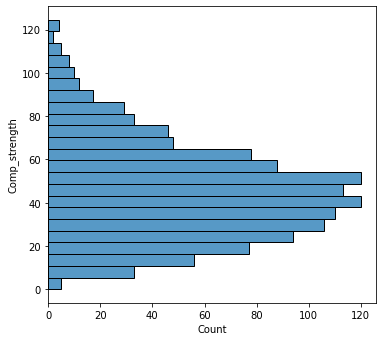

In [15]:
# visualizing categorical variable
plt.figure(figsize =(20,12))
plt.subplot(2,3,1)
sns.histplot(y='Comp_strength',data =df)


<AxesSubplot:ylabel='W_CM_ratio'>

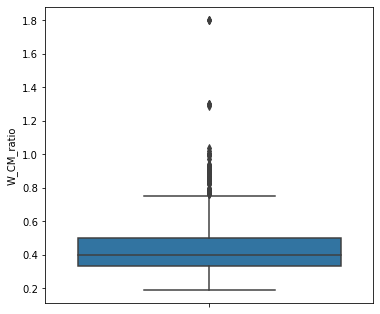

In [16]:
plt.figure(figsize =(20,12))
plt.subplot(2,3,2)
sns.boxplot(y='W_CM_ratio',data =df)

<AxesSubplot:xlabel='W_CM_ratio', ylabel='Comp_strength'>

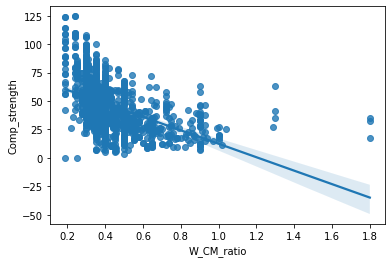

In [17]:
sns.regplot(x='W_CM_ratio', y='Comp_strength',data=df)

<AxesSubplot:xlabel='cement_kg', ylabel='Comp_strength'>

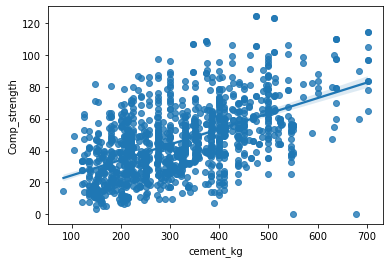

In [18]:
sns.regplot(x='cement_kg', y='Comp_strength',data=df)

<AxesSubplot:xlabel='CA_KG', ylabel='Comp_strength'>

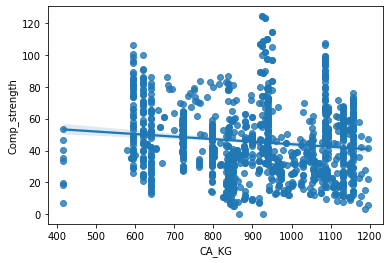

In [19]:
sns.regplot(x='CA_KG', y='Comp_strength',data=df)

<AxesSubplot:xlabel='FA_KG', ylabel='Comp_strength'>

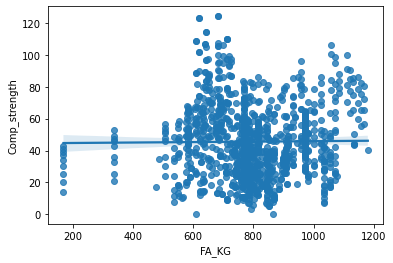

In [20]:
sns.regplot(x='FA_KG', y='Comp_strength',data=df)

<AxesSubplot:xlabel='Flyash_kg', ylabel='Comp_strength'>

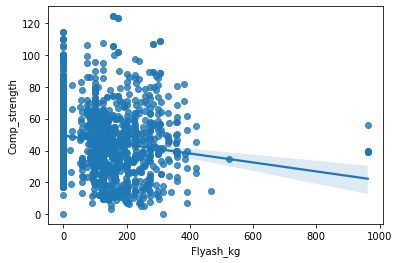

In [21]:
sns.regplot(x='Flyash_kg', y='Comp_strength',data=df)

<AxesSubplot:xlabel='SP_KG', ylabel='Comp_strength'>

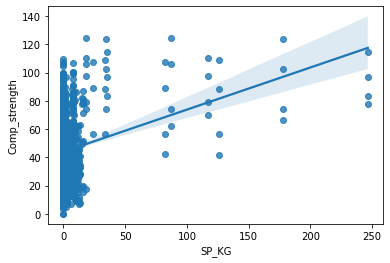

In [22]:
sns.regplot(x='SP_KG', y='Comp_strength',data=df)

<AxesSubplot:xlabel='SF', ylabel='Comp_strength'>

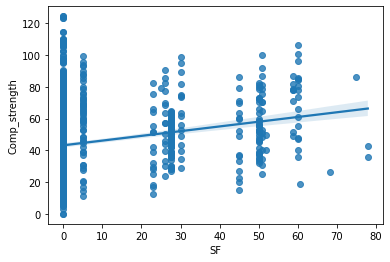

In [23]:
sns.regplot(x='SF', y='Comp_strength',data=df)

<AxesSubplot:xlabel='age', ylabel='Comp_strength'>

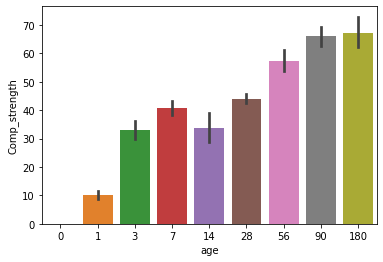

In [24]:
sns.barplot(x='age', y='Comp_strength',data=df)

<AxesSubplot:xlabel='water_kg', ylabel='Comp_strength'>

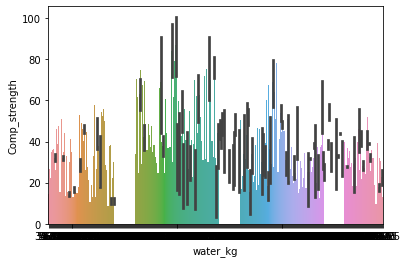

In [25]:
sns.barplot(x='water_kg', y='Comp_strength',data=df)

<AxesSubplot:xlabel='FA_KG', ylabel='Comp_strength'>

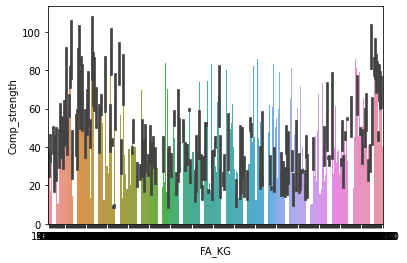

In [26]:
sns.barplot(x='FA_KG', y='Comp_strength',data=df)

<AxesSubplot:xlabel='CA_KG', ylabel='Comp_strength'>

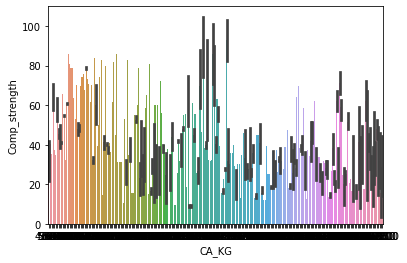

In [27]:
sns.barplot(x='CA_KG', y='Comp_strength',data=df)

<AxesSubplot:xlabel='Comp_strength', ylabel='Count'>

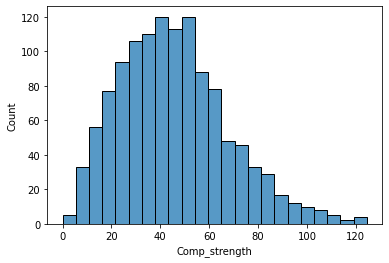

In [28]:
sns.histplot(x='Comp_strength',data=df)

<AxesSubplot:xlabel='W_CM_ratio', ylabel='Count'>

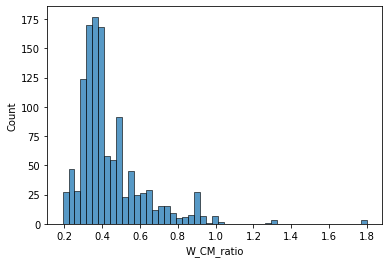

In [29]:
sns.histplot(x='W_CM_ratio',data=df)

<AxesSubplot:xlabel='CA_KG', ylabel='Count'>

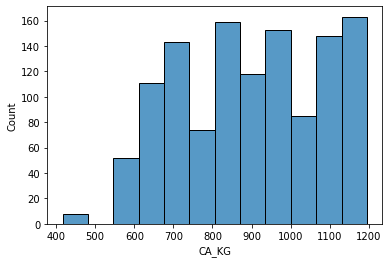

In [30]:
sns.histplot(x='CA_KG',data=df)

<AxesSubplot:xlabel='FA_KG', ylabel='Count'>

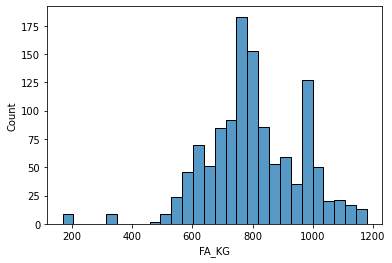

In [31]:
sns.histplot(x='FA_KG',data=df)

<AxesSubplot:xlabel='age', ylabel='Comp_strength'>

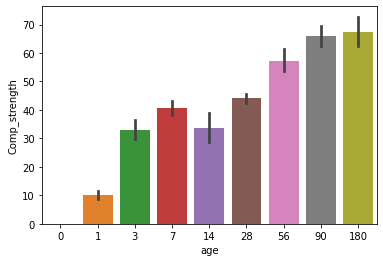

In [32]:
sns.barplot(x='age', y='Comp_strength',data=df)

<AxesSubplot:xlabel='CA_KG', ylabel='Comp_strength'>

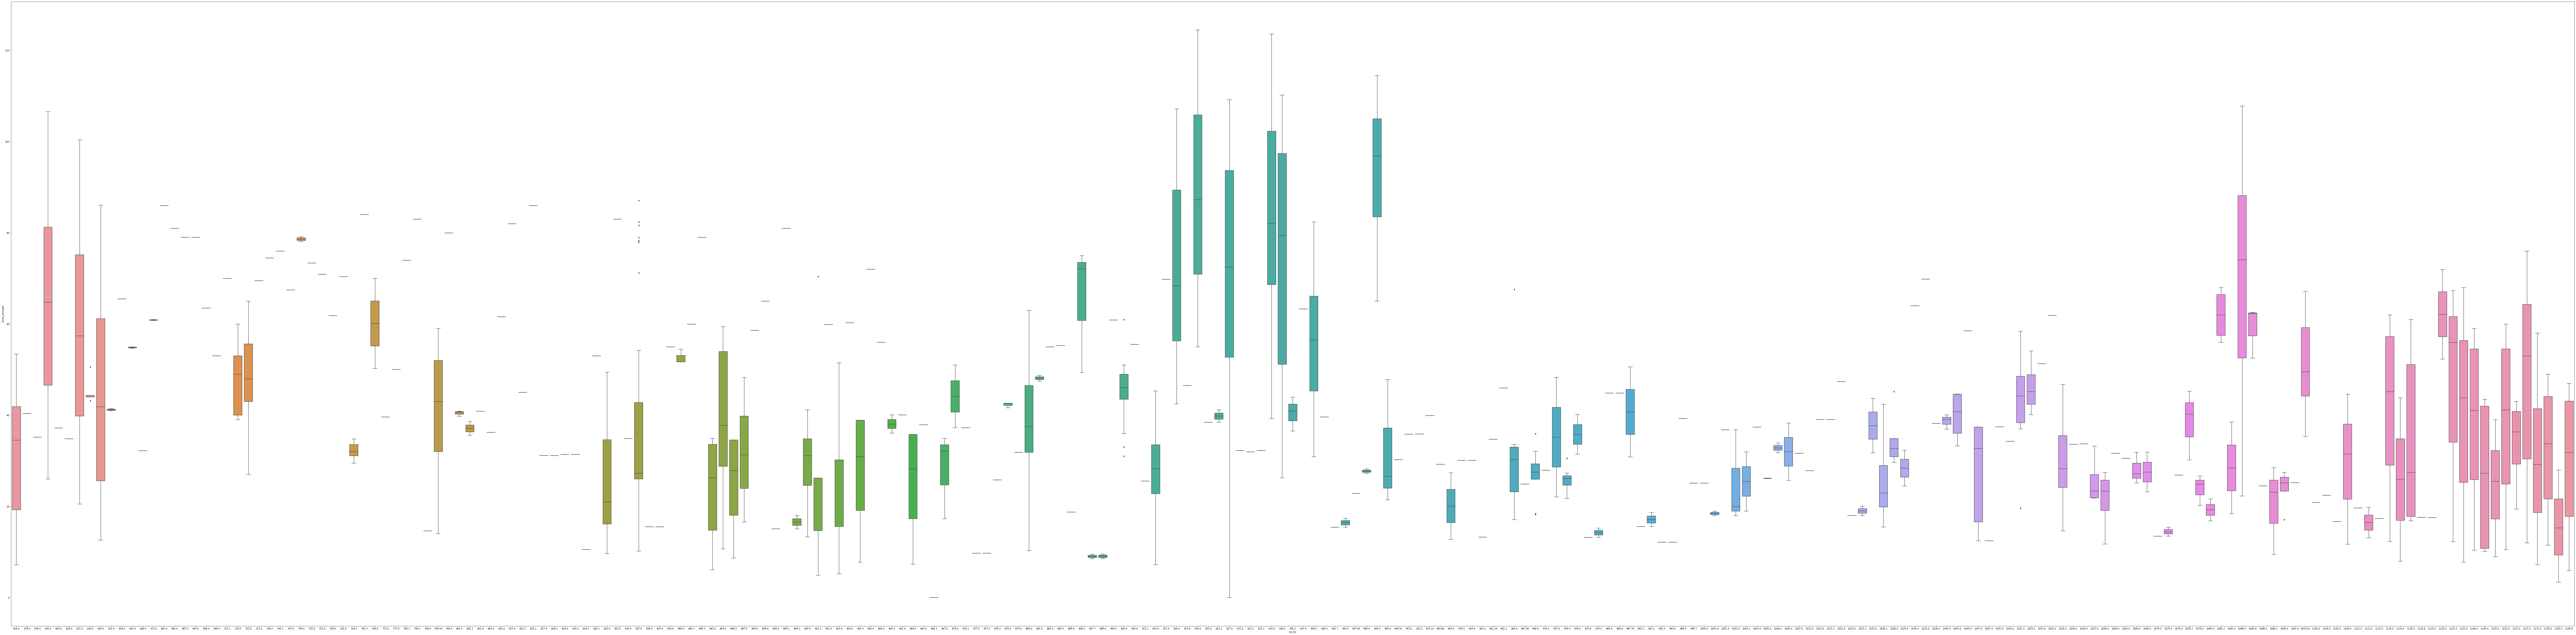

In [33]:
plt.figure(figsize =(200,50))
sns.boxplot(x='CA_KG', y='Comp_strength',data=df)

# Preparing the data for modelling (train - test split, rescaling etc.

In [34]:
# DEFINE X AND Y
x=df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=df['Comp_strength']

In [35]:
 print(x)

      W_CM_ratio  cement_kg  water_kg  Flyash_kg   FA_KG   CA_KG  SP_KG   SF  \
0           0.50      331.0     165.0        0.0   768.0  1153.0    0.0  0.0   
1           0.50      331.0     165.0        0.0   768.0  1153.0    0.0  0.0   
2           0.50      331.0     165.0        0.0   768.0  1153.0    0.0  0.0   
3           0.50      331.0     165.0        0.0   768.0  1153.0    0.0  0.0   
4           0.53      207.0     157.0       89.0   786.0  1178.0    0.0  0.0   
...          ...        ...       ...        ...     ...     ...    ...  ...   
1209        0.90      120.0     140.0      200.0  1034.0   916.0   13.5  0.0   
1210        0.90      120.0     140.0      200.0  1034.0   916.0   13.5  0.0   
1211        0.90      120.0     140.0      200.0  1034.0   916.0   13.5  0.0   
1212        0.90      120.0     140.0      200.0  1034.0   916.0   13.5  0.0   
1213        0.90      120.0     140.0      200.0  1034.0   916.0   13.5  0.0   

      age  
0       1  
1       7  
2  

In [36]:
print(y)

0       19.4
1       32.6
2       40.1
3       43.0
4       11.5
        ... 
1209    33.5
1210    33.5
1211    33.5
1212    28.0
1213    28.0
Name: Comp_strength, Length: 1214, dtype: float64


In [37]:
#split the dataset in training set and test test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [38]:
x_train.head()

,W_CM_ratio,cement_kg,water_kg,Flyash_kg,FA_KG,CA_KG,SP_KG,SF,age
253,0.30,500.0,150.00,0.0,719.00,1086.00,0.00,5.0,3
1163,0.32,512.0,163.70,0.0,581.76,1093.65,0.00,0.0,7
992,0.34,250.0,85.00,160.0,746.00,837.00,0.01,0.0,28
351,0.50,410.0,205.00,0.0,605.00,1132.00,0.00,5.0,28
1005,0.34,198.0,67.32,232.0,874.00,900.00,0.20,0.0,28


In [39]:
y_train.head()

253     58.30
1163    49.57
992     26.70
351     57.30
1005    46.00
Name: Comp_strength, dtype: float64

# x_train, x_test = train_test_split, MinMaxscaler

In [40]:
# 1. Instantiate an object
scaler = MinMaxScaler().fit(x_train)


In [41]:
print(scaler)

MinMaxScaler()


In [42]:
scaler.data_min_

array([1.9000e-01, 8.3000e+01, 3.4030e+01, 0.0000e+00, 1.6905e+02,
       4.1640e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [43]:
scaler.data_max_

array([   1.8  ,  702.   ,  276.25 ,  962.5  , 1166.   , 1195.   ,
        246.402,   78.   ,  180.   ])

In [44]:
x_train.describe()

,W_CM_ratio,cement_kg,water_kg,Flyash_kg,FA_KG,CA_KG,SP_KG,SF,age
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.439717,319.212314,163.758381,133.978952,798.054476,900.765936,5.872022,8.465960,35.949352
std,0.189815,127.380112,33.501935,114.697994,157.958298,178.468557,23.567762,16.799071,38.072870
min,0.190000,83.000000,34.030000,0.000000,169.050000,416.400000,0.000000,0.000000,0.000000
25%,0.330000,213.000000,150.000000,60.000000,700.000000,752.000000,0.000000,0.000000,7.000000
50%,0.390000,300.000000,175.000000,124.800000,785.000000,916.000000,0.378000,0.000000,28.000000
75%,0.500000,407.000000,183.000000,197.000000,907.000000,1086.000000,2.870000,5.000000,28.000000
max,1.800000,702.000000,276.250000,962.500000,1166.000000,1195.000000,246.402000,78.000000,180.000000


In [45]:
scaler.feature_range

(0, 1)

In [46]:
scaler.transform(x_train)

array([[6.83229814e-02, 6.73667205e-01, 4.78779622e-01, ...,
        0.00000000e+00, 6.41025641e-02, 1.66666667e-02],
       [8.07453416e-02, 6.93053312e-01, 5.35339774e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.88888889e-02],
       [9.31677019e-02, 2.69789984e-01, 2.10428536e-01, ...,
        4.05840862e-05, 0.00000000e+00, 1.55555556e-01],
       ...,
       [8.69565217e-02, 3.10177706e-01, 6.08826686e-01, ...,
        4.46424948e-03, 3.52564103e-01, 1.55555556e-01],
       [8.07453416e-02, 6.73667205e-01, 5.20064404e-01, ...,
        1.54219527e-03, 0.00000000e+00, 1.55555556e-01],
       [1.11801242e-01, 7.49256866e-01, 6.94740319e-01, ...,
        2.99551140e-02, 0.00000000e+00, 3.88888889e-02]])

In [47]:
x_train_scaled = scaler.transform(x_train)

In [48]:
x_train_scaled 

array([[6.83229814e-02, 6.73667205e-01, 4.78779622e-01, ...,
        0.00000000e+00, 6.41025641e-02, 1.66666667e-02],
       [8.07453416e-02, 6.93053312e-01, 5.35339774e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.88888889e-02],
       [9.31677019e-02, 2.69789984e-01, 2.10428536e-01, ...,
        4.05840862e-05, 0.00000000e+00, 1.55555556e-01],
       ...,
       [8.69565217e-02, 3.10177706e-01, 6.08826686e-01, ...,
        4.46424948e-03, 3.52564103e-01, 1.55555556e-01],
       [8.07453416e-02, 6.73667205e-01, 5.20064404e-01, ...,
        1.54219527e-03, 0.00000000e+00, 1.55555556e-01],
       [1.11801242e-01, 7.49256866e-01, 6.94740319e-01, ...,
        2.99551140e-02, 0.00000000e+00, 3.88888889e-02]])

In [49]:
print(x_train_scaled) 

[[6.83229814e-02 6.73667205e-01 4.78779622e-01 ... 0.00000000e+00
  6.41025641e-02 1.66666667e-02]
 [8.07453416e-02 6.93053312e-01 5.35339774e-01 ... 0.00000000e+00
  0.00000000e+00 3.88888889e-02]
 [9.31677019e-02 2.69789984e-01 2.10428536e-01 ... 4.05840862e-05
  0.00000000e+00 1.55555556e-01]
 ...
 [8.69565217e-02 3.10177706e-01 6.08826686e-01 ... 4.46424948e-03
  3.52564103e-01 1.55555556e-01]
 [8.07453416e-02 6.73667205e-01 5.20064404e-01 ... 1.54219527e-03
  0.00000000e+00 1.55555556e-01]
 [1.11801242e-01 7.49256866e-01 6.94740319e-01 ... 2.99551140e-02
  0.00000000e+00 3.88888889e-02]]


In [50]:
scaler = MinMaxScaler().fit(x_test)

In [51]:
scaler.data_min_

array([1.9000e-01, 1.2000e+02, 4.6200e+01, 0.0000e+00, 1.6905e+02,
       5.7800e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [52]:
scaler.data_max_

array([   1.29 ,  702.   ,  252.   ,  962.5  , 1180.   , 1195.   ,
        177.664,   68.3  ,  180.   ])

In [53]:
scaler.feature_range

(0, 1)

In [54]:
x_test.describe()

,W_CM_ratio,cement_kg,water_kg,Flyash_kg,FA_KG,CA_KG,SP_KG,SF,age
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.438959,315.980438,165.086148,136.478438,808.640877,890.026301,3.669700,6.955616,34.339726
std,0.163601,117.416709,32.700587,117.290424,152.884949,177.454785,14.273515,14.871805,34.472950
min,0.190000,120.000000,46.200000,0.000000,169.050000,578.000000,0.000000,0.000000,1.000000
25%,0.330000,220.000000,150.000000,60.000000,715.100000,722.000000,0.000000,0.000000,7.000000
50%,0.400000,300.000000,180.000000,124.800000,786.000000,900.000000,0.310000,0.000000,28.000000
75%,0.500000,397.000000,186.450000,192.500000,931.000000,1052.300000,2.250000,0.000000,28.000000
max,1.290000,702.000000,252.000000,962.500000,1180.000000,1195.000000,177.664000,68.300000,180.000000


In [55]:
scaler.transform(x_test)

array([[3.09090909e-01, 1.49484536e-01, 5.38386783e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.50837989e-01],
       [1.90909091e-01, 3.32989691e-01, 3.85422741e-01, ...,
        1.68858069e-04, 0.00000000e+00, 1.50837989e-01],
       [1.45454545e-01, 4.46735395e-01, 4.21768707e-01, ...,
        1.18200648e-03, 0.00000000e+00, 1.50837989e-01],
       ...,
       [1.27272727e-01, 4.55326460e-01, 6.57434402e-01, ...,
        7.58172731e-03, 4.02635432e-01, 4.97206704e-01],
       [4.27272727e-01, 2.92096220e-01, 7.09426628e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.50837989e-01],
       [1.27272727e-01, 2.66323024e-01, 6.57434402e-01, ...,
        3.09573127e-03, 4.02635432e-01, 3.35195531e-02]])

In [56]:
x_test_scaled = scaler.transform(x_test) 

In [57]:
print (x_train_scaled)

[[6.83229814e-02 6.73667205e-01 4.78779622e-01 ... 0.00000000e+00
  6.41025641e-02 1.66666667e-02]
 [8.07453416e-02 6.93053312e-01 5.35339774e-01 ... 0.00000000e+00
  0.00000000e+00 3.88888889e-02]
 [9.31677019e-02 2.69789984e-01 2.10428536e-01 ... 4.05840862e-05
  0.00000000e+00 1.55555556e-01]
 ...
 [8.69565217e-02 3.10177706e-01 6.08826686e-01 ... 4.46424948e-03
  3.52564103e-01 1.55555556e-01]
 [8.07453416e-02 6.73667205e-01 5.20064404e-01 ... 1.54219527e-03
  0.00000000e+00 1.55555556e-01]
 [1.11801242e-01 7.49256866e-01 6.94740319e-01 ... 2.99551140e-02
  0.00000000e+00 3.88888889e-02]]


# Traning model

In [58]:
#train the model on training test
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [59]:
#predict the test set results
y_pred=regr.predict(x_test)
print(y_pred)

[ 31.52891817  43.88181804  51.27920152  30.02777217  74.78442951
  46.927005    28.56890158  39.16493177  55.63530974  69.50674714
  23.13188039  37.21119764  86.41352174  42.42059237  21.13188756
  49.55468839  62.34064523  44.39158701  65.98536067  54.45074156
  77.34001696  41.15012518  36.20304304  39.52911171  45.69005976
  31.19945774  55.11822291  28.71257591  29.90122377  71.41145986
  62.83023411  58.79106355  21.57446531  40.79361076  65.08704838
  34.11686276  37.85455068  55.8046282   49.93170646  17.8126785
  39.69322359  34.15196889  46.99519574  69.12888619  42.07381646
  57.5124409   33.94877698  47.83072271  35.57495017  38.79157801
  40.38554159  41.3371434   81.01641287  74.0349185   58.54084151
  82.45676608  64.46389682  34.4821051   37.96260704  60.94855116
  47.66796936  43.39421538  11.68860159  48.82772118  32.27212578
  23.18086389  58.54570476  35.86519316  35.22566534  26.13031511
  42.02864316  28.3380101   32.58125194  36.85234069  46.32790227
  49.004636

In [60]:
#predict the test set results
y_pred=regr.predict(x_test)
print(y_pred)

[ 31.52891817  43.88181804  51.27920152  30.02777217  74.78442951
  46.927005    28.56890158  39.16493177  55.63530974  69.50674714
  23.13188039  37.21119764  86.41352174  42.42059237  21.13188756
  49.55468839  62.34064523  44.39158701  65.98536067  54.45074156
  77.34001696  41.15012518  36.20304304  39.52911171  45.69005976
  31.19945774  55.11822291  28.71257591  29.90122377  71.41145986
  62.83023411  58.79106355  21.57446531  40.79361076  65.08704838
  34.11686276  37.85455068  55.8046282   49.93170646  17.8126785
  39.69322359  34.15196889  46.99519574  69.12888619  42.07381646
  57.5124409   33.94877698  47.83072271  35.57495017  38.79157801
  40.38554159  41.3371434   81.01641287  74.0349185   58.54084151
  82.45676608  64.46389682  34.4821051   37.96260704  60.94855116
  47.66796936  43.39421538  11.68860159  48.82772118  32.27212578
  23.18086389  58.54570476  35.86519316  35.22566534  26.13031511
  42.02864316  28.3380101   32.58125194  36.85234069  46.32790227
  49.004636

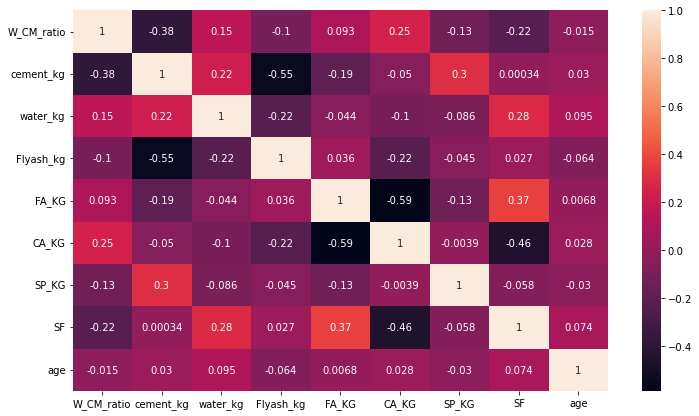

In [61]:
#heatmap
plt.figure(figsize=(12,7))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

# Residual analysis (res = y_train - y_train_pred)

In [62]:
#evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6160103923921063

C:\Users\JYOTHISHREE R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual vs.Predicted')

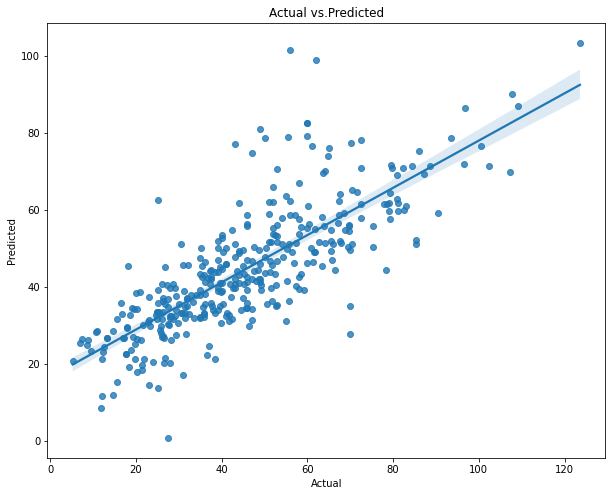

In [68]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.regplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs.Predicted')